In [ ]:
#Search project
#CGS616
#BY - Arnav kumar (200187)
#Jiyanshu dhaka (220481)
#Vikram kumar(231280003)

In [ ]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [2]:
import sqlite3
input_file_path = 'History'

#reading the history file
conn = sqlite3.connect(input_file_path)
sql_statement = "SELECT url,title, datetime(last_visit_time/1000000-11644473600,'unixepoch') FROM urls;"
df = pd.read_sql_query(sql_statement, conn)
df.columns = ["URL", "Title","Time"]

#print the column names
print(df.columns)

Index(['URL', 'Title', 'Time'], dtype='object')


In [3]:
#print the URL table
cp_newdata=df
cp_newdata.columns
cp_newdata.sort_values(by='Time', inplace=True)
cp_newdata

,URL,Title,Time
112,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1601-01-01 00:00:00
118,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,1601-01-01 00:00:00
0,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2023-08-12 03:03:18
2,https://maps.google.com/,Maps,2023-08-12 03:03:18
350,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",2023-10-25 15:15:32
...,...,...,...
38,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2024-01-23 10:05:47
36,https://chat.openai.com/,ChatGPT,2024-01-23 10:05:49
2720,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,2024-01-23 10:36:57
2788,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,2024-01-23 10:36:59


In [4]:
#making the Time column as index
print(df.columns)
df.index = df['Time']
del df['Time']


Index(['URL', 'Title', 'Time'], dtype='object')


In [5]:
#Updating headers to provide information about the user
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'vikramk23@iitk.ac.in'  # Stick in your IITK email id
    }
)


In [6]:
# making csv file of history 
df.to_csv('chrome_historyR.csv')

In [7]:


#read from chrome history.csv
df= pd.read_csv('chrome_historyR.csv')
df.Time = pd.to_datetime(df.Time, errors='coerce')
docs = df.Title.unique()
docs

array(['Image Feature Extraction | Feature Extraction Using Python',
       'Introduction to machine learning: k-nearest neighbors - PMC',
       'Hotstar Mod APK for IPL.apkbooth.com', ...,
       'Coin Toss Sample Space', 'Probability Function Requirements',
       'Navigate - Google Search'], dtype=object)

In [8]:
df.head()

,Time,URL,Title
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com
3,2023-08-12 03:03:18,https://maps.google.com/,Maps
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ..."


In [9]:
from nltk.tokenize import RegexpTokenizer

from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from stop_words import get_stop_words


In [10]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [11]:
doc_set = docs.tolist()

In [12]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [13]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [21]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [22]:
ldamodel.print_topics(3)

[(0,
  '0.048*"youtub" + 0.026*"googl" + 0.023*"search" + 0.018*"1686" + 0.013*"learn" + 0.011*"iitk" + 0.010*"cs771" + 0.010*"github" + 0.009*"neural" + 0.008*"short"'),
 (1,
  '0.028*"cricbuzz" + 0.027*"vs" + 0.024*"cricket" + 0.022*"2023" + 0.020*"cs771" + 0.018*"assign" + 0.014*"pdf" + 0.014*"match" + 0.012*"icc" + 0.011*"world"'),
 (2,
  '0.029*"googl" + 0.022*"search" + 0.021*"youtub" + 0.017*"1686" + 0.014*"kanpur" + 0.014*"iit" + 0.011*"jupyt" + 0.009*"onlin" + 0.009*"notebook" + 0.009*"webmail"')]

In [23]:
ldamodel.get_topic_terms(0,10)

[(325, 0.048252814),
 (52, 0.02607029),
 (53, 0.023025148),
 (1331, 0.017838614),
 (7, 0.013152742),
 (302, 0.010776795),
 (285, 0.009909297),
 (286, 0.009586954),
 (445, 0.0085085705),
 (1382, 0.008096829)]

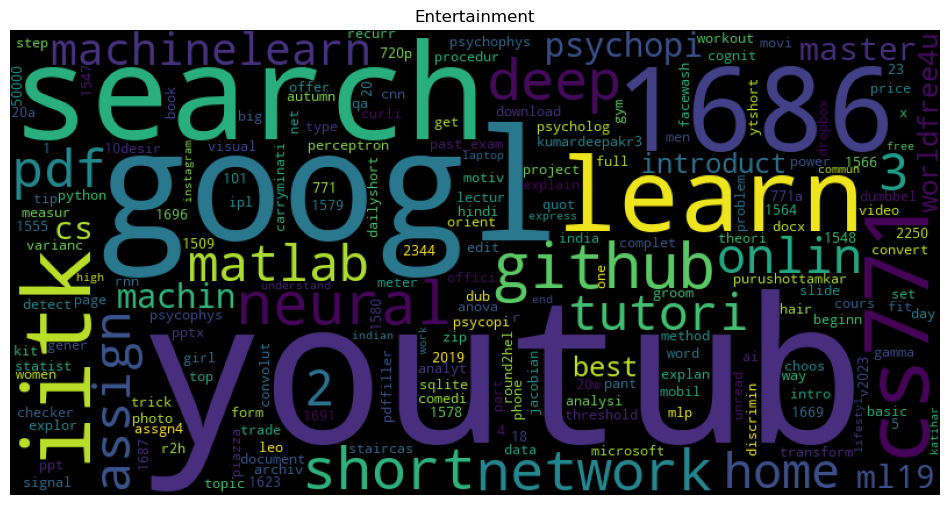

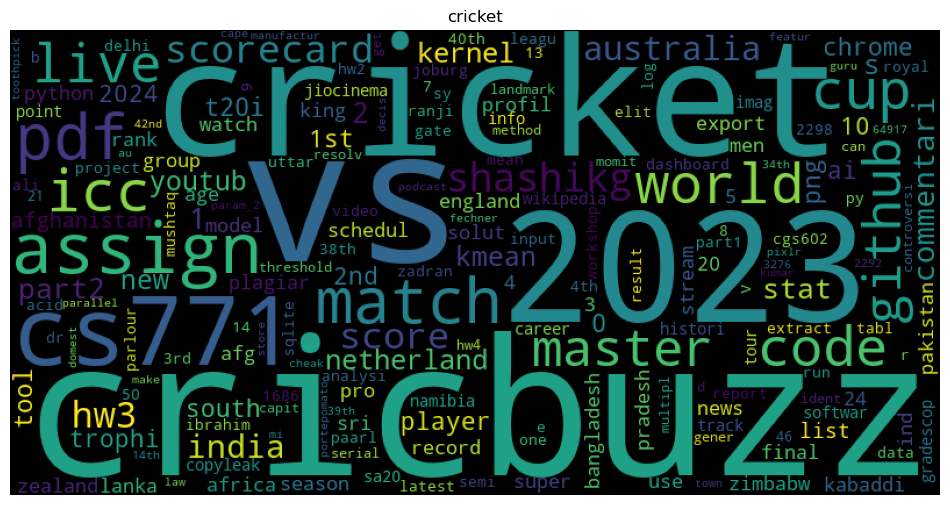

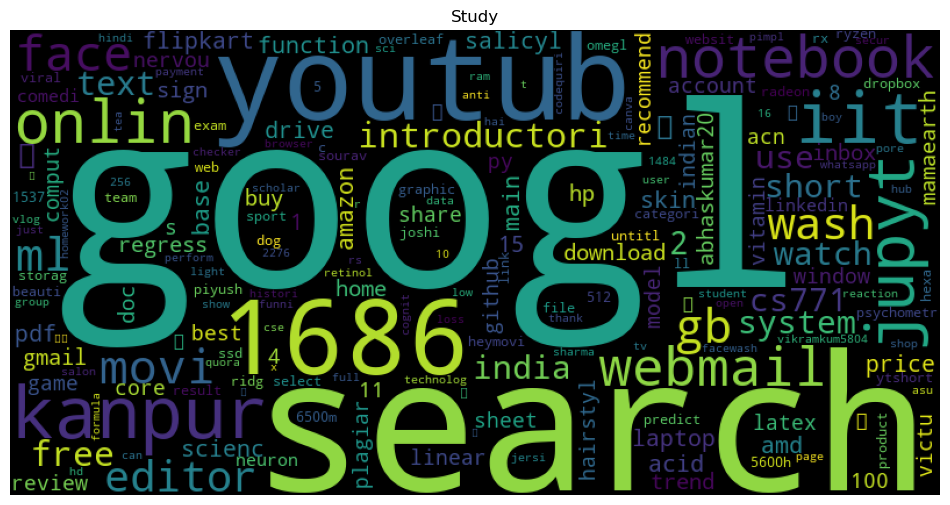

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define labels for each category
topic_labels = {
    0:  "Entertainment",
    1:  "cricket",
    2:  "Study",

}
topic_keywords = {
    "Entertainment": ["entertainment", "movies", "music", "youtube"],
    "cricket": ["cricbuzz", "cricket", "scorecard", "internet"],
    "Study": ["study", "learning","web", "research", "education", "iitk"]  
}

for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12, 8))
    
    # getting topic keywords and probabilities from the topic
    topic_words = ldamodel.show_topic(t, 200)
    
    # Removing repetative words from the list
    exclude_words = ["http", "com", "www"]
    filtered_words = [(word, prob) for word, prob in topic_words if word.lower() not in exclude_words]
    
    # finding the frequency of the words
    word_freq = dict(filtered_words)
    
    # making the word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.imshow(wordcloud)
    plt.axis("off")
    
    # show topic number
    label = topic_labels.get(t, f"Topic #{t}")
    
    #plot
    plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.title(label)
    plt.show()

In [25]:
topic = [0]*len(df)
for idx in range(len(df)):
    test_idx = doc_set.index(df.Title[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [26]:
df['Topic'] = topic

In [27]:
import copy
df_new = copy.deepcopy(df)
df_data=copy.deepcopy(df)
df_new

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,2
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...,...
2939,2024-01-23 10:05:47,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2
2940,2024-01-23 10:05:49,https://chat.openai.com/,ChatGPT,2
2941,2024-01-23 10:36:57,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,0
2942,2024-01-23 10:36:59,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,2


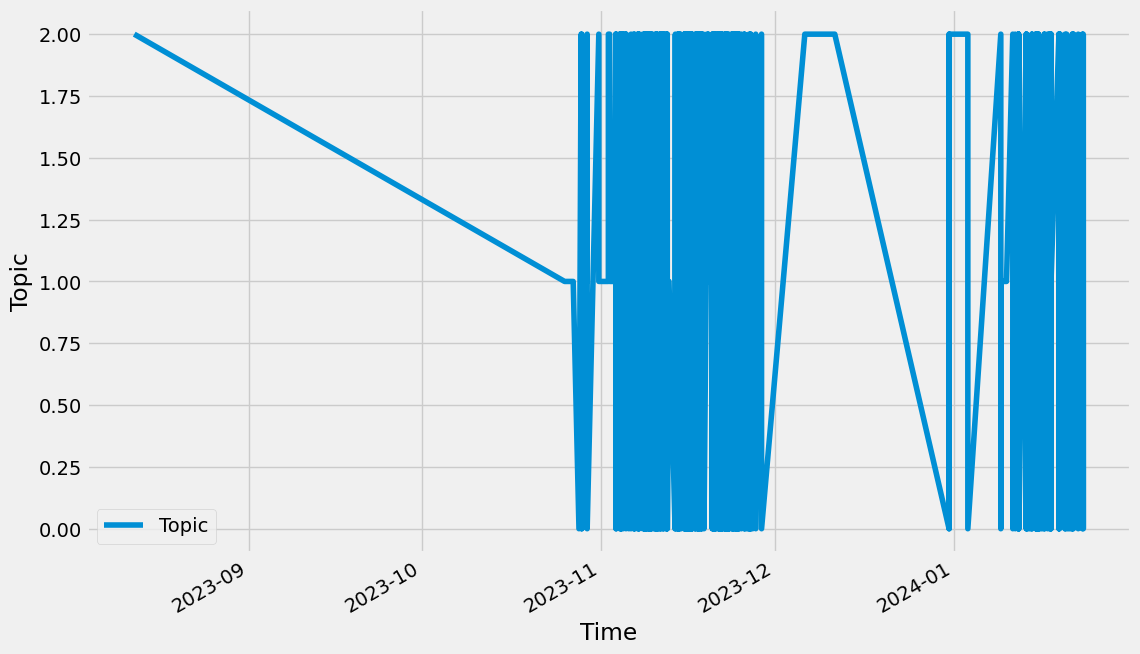

In [28]:
sorted_data = df.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [29]:
cp_data = df

In [30]:
df

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,2
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...,...
2939,2024-01-23 10:05:47,https://chat.openai.com/c/51391754-0169-4186-b...,ChatGPT,2
2940,2024-01-23 10:05:49,https://chat.openai.com/,ChatGPT,2
2941,2024-01-23 10:36:57,https://chat.openai.com/c/9f435959-fd3d-4ac0-a...,Coin Toss Sample Space,0
2942,2024-01-23 10:36:59,https://chat.openai.com/c/b07b0974-5b64-40b3-9...,Probability Function Requirements,2


In [31]:
cp_data.head()

,Time,URL,Title,Topic
0,NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1
1,NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2,2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2
3,2023-08-12 03:03:18,https://maps.google.com/,Maps,2
4,2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1


In [32]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

,URL,Title,Topic
Time,,,
NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1
NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2
2023-08-12 03:03:18,https://maps.google.com/,Maps,2
2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1


In [33]:
df.head(100)

,URL,Title,Topic
Time,,,
NaT,https://www.analyticsvidhya.com/blog/2019/08/3...,Image Feature Extraction | Feature Extraction ...,1
NaT,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,Introduction to machine learning: k-nearest ne...,0
2023-08-12 03:03:18,http://www.mediafire.com/file/wys0do3ytbkhwlj/...,Hotstar Mod APK for IPL.apkbooth.com,2
2023-08-12 03:03:18,https://maps.google.com/,Maps,2
2023-10-25 15:15:32,https://m.cricbuzz.com/live-cricket-scorecard/...,"Cricket scorecard - Australia vs Netherlands, ...",1
...,...,...,...
2023-11-03 13:36:25,https://chrome.google.com/webstore/detail/scis...,SciSpace: Do hours of research in minutes - Ch...,1
2023-11-03 13:36:25,https://chrome.google.com/webstore/detail/scis...,SciSpace: Do hours of research in minutes - Ch...,1
2023-11-03 13:37:52,https://typeset.io/library/untitled-collection...,2023.09.18.558354v1.full.pdf,1


In [34]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))


In [35]:
cp_data.index.day_name()
cp_data['URL'] = cp_data.index.day_name()
cp_data.index = pd.to_datetime(cp_data.index)

# Extract the time
cp_data['Time'] = cp_data.index.time
print(cp_data)


                           URL  \
Time                             
NaT                        NaN   
NaT                        NaN   
2023-08-12 03:03:18   Saturday   
2023-08-12 03:03:18   Saturday   
2023-10-25 15:15:32  Wednesday   
...                        ...   
2024-01-23 10:05:47    Tuesday   
2024-01-23 10:05:49    Tuesday   
2024-01-23 10:36:57    Tuesday   
2024-01-23 10:36:59    Tuesday   
2024-01-23 10:39:57    Tuesday   

                                                                 Title  Topic  \
Time                                                                            
NaT                  Image Feature Extraction | Feature Extraction ...      1   
NaT                  Introduction to machine learning: k-nearest ne...      0   
2023-08-12 03:03:18               Hotstar Mod APK for IPL.apkbooth.com      2   
2023-08-12 03:03:18                                               Maps      2   
2023-10-25 15:15:32  Cricket scorecard - Australia vs Netherlands, ... 

In [36]:
cp_data['Day']=cp_data['URL']
cp_data['Hour']=cp_data.index.hour
cp_data['Minute']=cp_data.index.minute
del cp_data['URL'],cp_data['Title']
x=cp_data


In [37]:
x=cp_data
x
#del x['Time']


,Topic,Time,Day,Hour,Minute
Time,,,,,
NaT,1,NaT,NaN,NaN,NaN
NaT,0,NaT,NaN,NaN,NaN
2023-08-12 03:03:18,2,03:03:18,Saturday,3.0,3.0
2023-08-12 03:03:18,2,03:03:18,Saturday,3.0,3.0
2023-10-25 15:15:32,1,15:15:32,Wednesday,15.0,15.0
...,...,...,...,...,...
2024-01-23 10:05:47,2,10:05:47,Tuesday,10.0,5.0
2024-01-23 10:05:49,2,10:05:49,Tuesday,10.0,5.0
2024-01-23 10:36:57,0,10:36:57,Tuesday,10.0,36.0


In [38]:
x_c = x.dropna()
x_c

,Topic,Time,Day,Hour,Minute
Time,,,,,
2023-08-12 03:03:18,2,03:03:18,Saturday,3.0,3.0
2023-08-12 03:03:18,2,03:03:18,Saturday,3.0,3.0
2023-10-25 15:15:32,1,15:15:32,Wednesday,15.0,15.0
2023-10-25 15:15:34,1,15:15:34,Wednesday,15.0,15.0
2023-10-25 15:16:11,1,15:16:11,Wednesday,15.0,16.0
...,...,...,...,...,...
2024-01-23 10:05:47,2,10:05:47,Tuesday,10.0,5.0
2024-01-23 10:05:49,2,10:05:49,Tuesday,10.0,5.0
2024-01-23 10:36:57,0,10:36:57,Tuesday,10.0,36.0


In [39]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

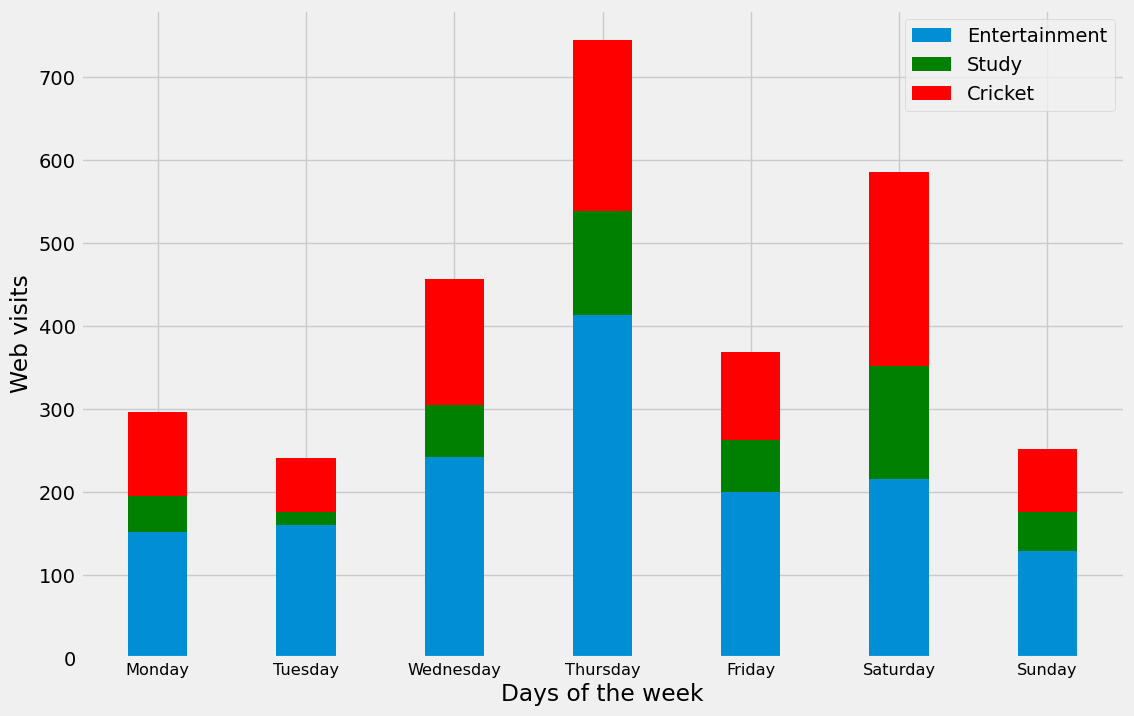

In [40]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Entertainment')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Study')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Cricket')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

occurrences = []
hours = range(24) 

for hour in hours:
    tlist = cp_data[cp_data.index.hour == hour].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))

t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for h in range(len(occurrences)):
    t0[h] = occurrences[h][0]
    t1[h] = occurrences[h][1]
    t2[h] = occurrences[h][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

plt.figure(figsize=(12,8))
p0 = plt.bar(range(len(hours)), t0, 0.4, label='Entertainment')
p1 = plt.bar(range(len(hours)), t1, 0.4, bottom=t0, color='green', label='Study')
p2 = plt.bar(range(len(hours)), t2, 0.4, bottom=cumt1, color='red', label='Cricket')
plt.xticks(range(len(hours)), hours, size='small')
plt.xlabel('Hours of the day')
plt.ylabel('Web visits')
plt.legend()
plt.show()



In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
data = x_c
cp_data = pd.DataFrame(data)
cp_data['Day'] = pd.Categorical(cp_data['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
cp_data = cp_data.sort_values(['Day', 'Hour', 'Minute'])
cp_data = cp_data.reset_index(drop=True)
cp_data_encoded = pd.get_dummies(cp_data, columns=['Day'])
X = cp_data_encoded[['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Hour', 'Minute']]
y = cp_data_encoded['Topic']
clf = RandomForestClassifier()
clf.fit(X, y)
#taking user input
user_day = input("Enter day (e.g., Monday): ")
user_hour = int(input("Enter hour (0-23): "))
user_minute = int(input("Enter minute (0-59): "))
user_input = pd.DataFrame([[0] * 7 + [user_hour, user_minute]], columns=['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Hour', 'Minute'])


predicted_topic = clf.predict(user_input)[0]
print(f"The predicted topic for the given input is: {predicted_topic}")


Enter day (e.g., Monday): Monday
Enter hour (0-23): 3
Enter minute (0-59): 3
The predicted topic for the given input is: 0


In [44]:
df_new.sort_values(by='Time', inplace=True)
#del df_new['Time'],df_new['URL'],df_new['Title']
df_new['Topic'] = df_new['Topic'].loc[df_new['Topic'].shift() != df_new['Topic']]
df_new
df_new['Next Topic'] = df_new['Topic'].shift(-1)
df_new = df_new.dropna()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1692\3651062270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.sort_values(by='Time', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1692\3651062270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Topic'] = df_new['Topic'].loc[df_new['Topic'].shift() != df_new['Topic']]
C:\Users\Dell\AppData\Local\Temp\ipykernel_1692\3651062270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [45]:
 
new_table = pd.crosstab(df_new['Topic'], df_new['Next Topic'], normalize='index')

# Calculate probabilities
probability_matrix = new_table.div(pivot_table.sum(axis=1), axis=0)

print(probability_matrix)

NameError: name 'pivot_table' is not defined

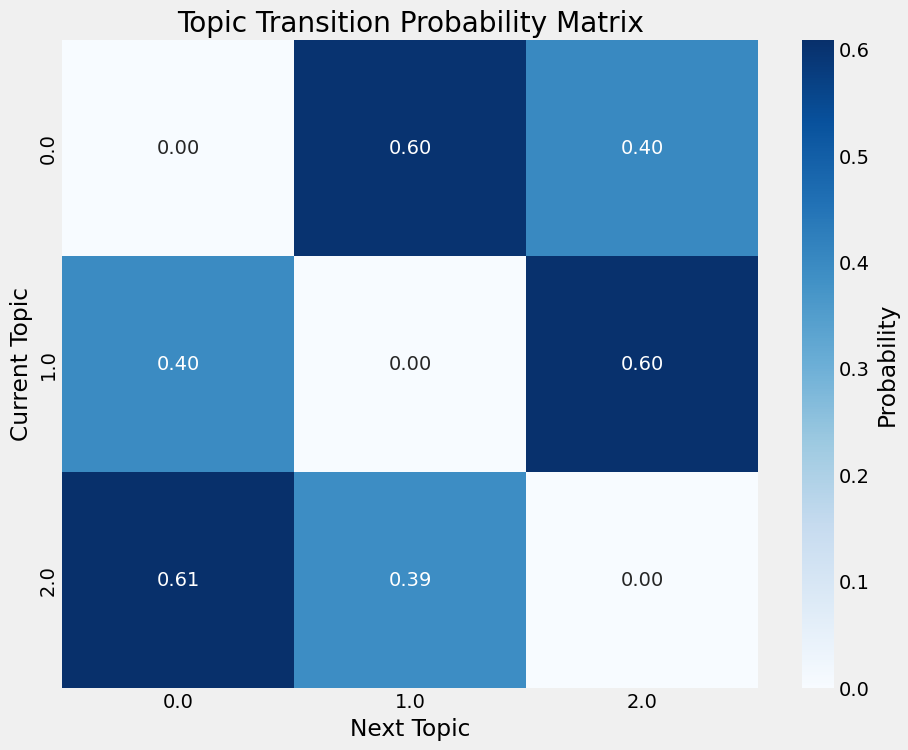

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df_new.sort_values(by='Time', inplace=True)
#del df_new['Time'], df_new['URL'], df_new['Title']


df_new['Topic'] = df_new['Topic'].loc[df_new['Topic'].shift() != df_new['Topic']]
df_new['Next Topic'] = df_new['Topic'].shift(-1)
df_new = df_new.dropna()

# Create a transition matrix
new_table = pd.crosstab(df_new['Topic'], df_new['Next Topic'], normalize='index')

# Calculate probabilities
probability_matrix = new_table.div(new_table.sum(axis=1), axis=0)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(probability_matrix, annot=True, cmap='Blues', fmt=".2f", cbar_kws={'label': 'Probability'})
plt.title('Topic Transition Probability Matrix')
plt.xlabel('Next Topic')
plt.ylabel('Current Topic')
plt.show()


In [47]:
x_new=copy.deepcopy(x_c)

In [48]:
df_data.sort_values(by='Time', inplace=True)
df_data['DwellTime'] = df_data['Time'].diff().dt.total_seconds()
df_data = df_data.dropna()
df_data.index = df_data['Time']
df_data['URL'] = df_data.index.day_name()
df_data['Day']=df_data['URL']
df_data['Hour']=df_data.index.hour
df_data['Minute']=df_data.index.minute
df_data.head(50)

,Time,URL,Title,Topic,DwellTime,Day,Hour,Minute
Time,,,,,,,,
2023-08-12 03:03:18,2023-08-12 03:03:18,Saturday,Maps,2,0.0,Saturday,3,3
2023-10-25 15:15:32,2023-10-25 15:15:32,Wednesday,"Cricket scorecard - Australia vs Netherlands, ...",1,6437534.0,Wednesday,15,15
2023-10-25 15:15:34,2023-10-25 15:15:34,Wednesday,"Australia vs Netherlands, 24th Match, ICC Cric...",1,2.0,Wednesday,15,15
2023-10-25 15:16:11,2023-10-25 15:16:11,Wednesday,Cricket scorecard - Madhya Pradesh vs Tamil Na...,1,37.0,Wednesday,15,16
2023-10-25 15:17:26,2023-10-25 15:17:26,Wednesday,"Madhya Pradesh vs Tamil Nadu, Group E, Syed Mu...",1,75.0,Wednesday,15,17
2023-10-26 16:41:32,2023-10-26 16:41:32,Thursday,Making 'good decisions' driving South Africa's...,1,91446.0,Thursday,16,41
2023-10-27 02:59:19,2023-10-27 02:59:19,Friday,World's most searched athletes on Google 2023,1,37067.0,Friday,2,59
2023-10-28 02:57:01,2023-10-28 02:57:01,Saturday,chandraghranh - Google Search,0,86262.0,Saturday,2,57
2023-10-28 02:57:47,2023-10-28 02:57:47,Saturday,chandra grahan 2023 sutak kaal live updates sh...,0,46.0,Saturday,2,57


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_data_encoded = pd.get_dummies(df_data, columns=['Day'])


X = df_data_encoded[['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Hour', 'Minute', 'DwellTime']]
y = df_data_encoded['Topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')



Model Accuracy: 0.6810176125244618


In [52]:
grouped_data = df_data.groupby(['Day', 'Topic'])['DwellTime'].sum().reset_index()
grouped_data['DwellTime'] = grouped_data['DwellTime'] 
pivoted_data = grouped_data.pivot(index='Day', columns='Topic', values='DwellTime').reset_index()

print(pivoted_data)


Topic        Day         0          1          2
0         Friday  167746.0   166785.0   240242.0
1         Monday  125825.0    65613.0   419463.0
2       Saturday  163842.0   111439.0   356746.0
3         Sunday  311166.0   170125.0   368522.0
4       Thursday   58763.0   210591.0   421269.0
5        Tuesday  128691.0    10430.0  1008192.0
6      Wednesday  145058.0  6597427.0  1129916.0


In [53]:
melted_data = pivoted_data.melt(id_vars='Day', var_name='Topic', value_name='DwellTime')
print(melted_data)


          Day Topic  DwellTime
0      Friday     0   167746.0
1      Monday     0   125825.0
2    Saturday     0   163842.0
3      Sunday     0   311166.0
4    Thursday     0    58763.0
5     Tuesday     0   128691.0
6   Wednesday     0   145058.0
7      Friday     1   166785.0
8      Monday     1    65613.0
9    Saturday     1   111439.0
10     Sunday     1   170125.0
11   Thursday     1   210591.0
12    Tuesday     1    10430.0
13  Wednesday     1  6597427.0
14     Friday     2   240242.0
15     Monday     2   419463.0
16   Saturday     2   356746.0
17     Sunday     2   368522.0
18   Thursday     2   421269.0
19    Tuesday     2  1008192.0
20  Wednesday     2  1129916.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group data by day and topic
grouped_data = df_data.groupby(['Day', 'Topic'])['DwellTime'].sum().reset_index()

# Pivot the table to have 'Day' as index, 'Topic' as columns, and 'DwellTime' as values
pivoted_data = grouped_data.pivot(index='Day', columns='Topic', values='DwellTime').reset_index()

# Display data
print(pivoted_data)

# Melt the pivoted DataFrame
melted_data = pivoted_data.melt(id_vars='Day', var_name='Topic', value_name='DwellTime')

# Convert 'Day' to a categorical variable with the specified order
melted_data['Day'] = pd.Categorical(melted_data['Day'], categories=weekday_order, ordered=True)
melted_data['Topic'] = melted_data['Topic'].astype(str)  

# Sort the melted DataFrame by 'Day' and 'Topic' for better visualization
melted_data.sort_values(by=['Day', 'Topic'], inplace=True)

# Plot a comparative bar chart for each day and each topic
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#2ca02c', '#d62728']
topics_legend = {'0': 'Entertainment', '1': 'Cricket', '2': 'Study'}

for i, (topic, data) in enumerate(melted_data.groupby('Topic')):
    day_positions = data['Day'].cat.codes + i * 0.2
    plt.bar(day_positions, data['DwellTime'], width=0.2, label=topics_legend[topic], color=colors[i], alpha=0.7)

plt.yscale('log')  # Use a log scale for better visibility
plt.xlabel('Days of the week')
plt.ylabel('Dwell Time')
plt.title('Comparative Dwell Time for Each Day and Topic')

# Set custom labels for x-axis
plt.xticks(range(len(weekday_order)), weekday_order)

plt.legend()
plt.show()


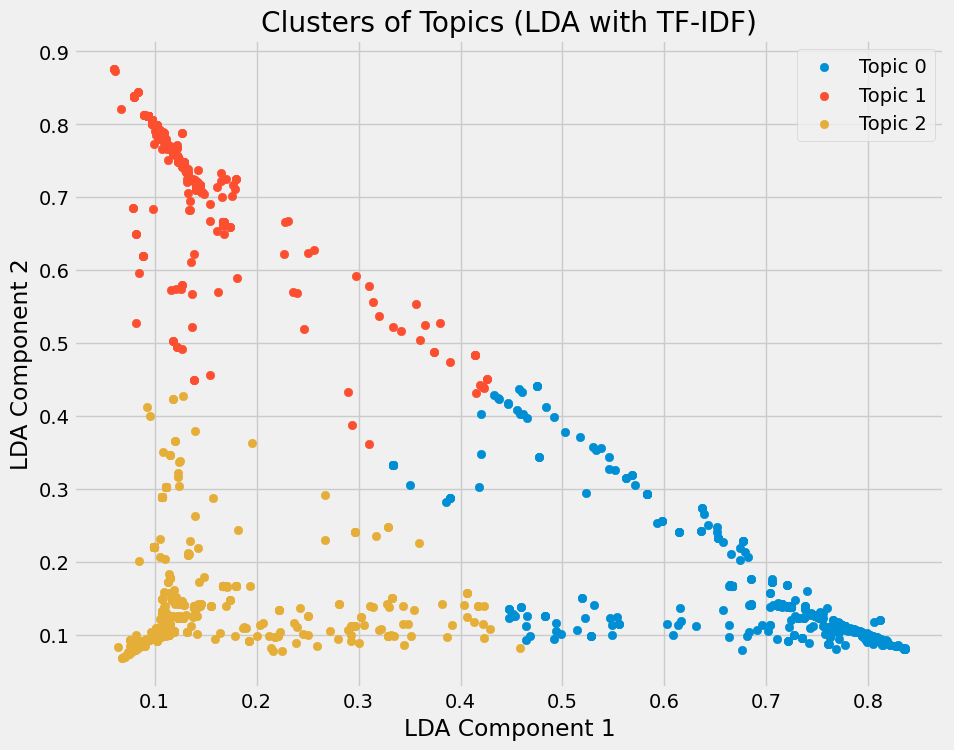

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# Split the data into training and testing sets
train_data, test_data = train_test_split(df_data, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_data['Title'])
X_test_tfidf = vectorizer.transform(test_data['Title'])

# Apply LDA to the TF-IDF-transformed training data
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
X_train_lda = lda.fit_transform(X_train_tfidf)

# Visualize the clusters using the first two components of LDA
plt.figure(figsize=(10, 8))
for topic in range(n_topics):
    indices = np.argmax(X_train_lda, axis=1) == topic
    plt.scatter(X_train_lda[indices, 0], X_train_lda[indices, 1], label=f'Topic {topic}')

plt.title('Clusters of Topics (LDA with TF-IDF)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()
